# Task-5

# Sales Prediction Using Python

Sales prediction means predictiong how much of a product people will buy based 
on factors such as the amount you spend to advertise your product,the segment
of people you advertise for,or the platform you are advertising on abouy your
product.

Typically,a product and servise-based business always need their Data Scientist
to predict their future sales with every step they take to manipulate the cost
of advertising their product.

In [1]:
#Importing the important Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Collection and Pre-Processing

In [2]:
data=pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.shape

(200, 4)

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Basic Observation

Avg expense spend is highest on TV

Avg expense spend is lowest on Radio

Max sale is 27 and min is 1.6

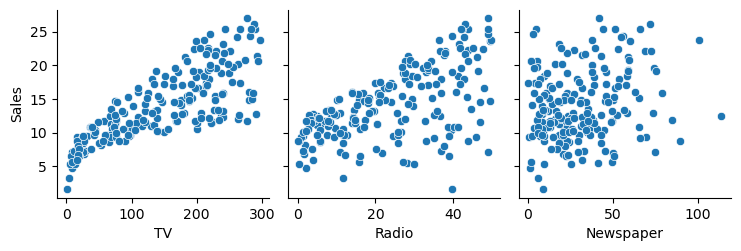

In [8]:
#Pair plot

sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='scatter')
plt.show()

Pair Plot Observation

When Advertising cost increases in TV Ads the sales will increase as well.
While the Newspaper and Radio is a bit Unpredictiable.

(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

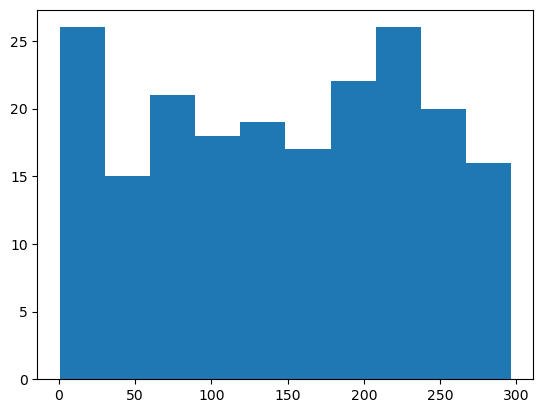

In [9]:
plt.hist(data['TV'],bins=10)

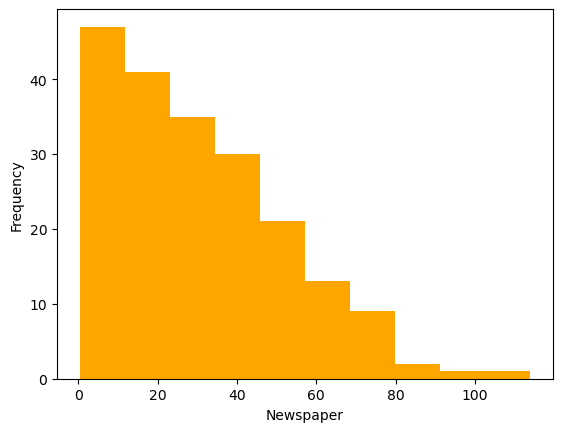

In [17]:
plt.hist(data['Newspaper'], bins=10, color='orange')
plt.xlabel('Newspaper')# Add this line to set the x-axis label
plt.ylabel('Frequency')
plt.show()


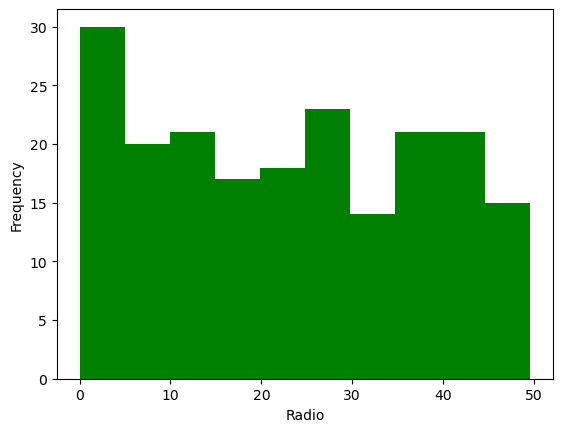

In [18]:
plt.hist(data['Radio'], bins=10, color='green')
plt.xlabel('Radio')  # Add this line to set the x-axis label
plt.ylabel('Frequency')
plt.show()


Histogram Observation

The majority sales is the result of low Advertising cost in newspaper

In [19]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


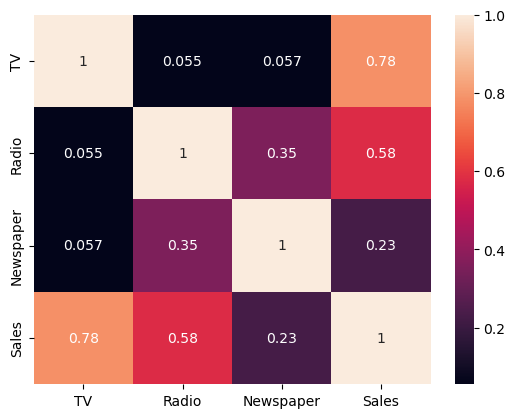

In [23]:
sns.heatmap(data.corr(),annot=True)
plt.show()

SALES IS HIGHLY CORRELATED WITH TV

# Linear Regession

In [24]:
#Lets train our model using linear regression as it it is correlated with only variable TV

x=data['TV'] #input variable as it is higghly correlated with sales

In [25]:
y=data["Sales"] #Target variable

In [26]:
print(x)

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64


In [27]:
print(y)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
#Building th emodel

# Assuming X_train is a 1D array
X_train_reshaped = X_train.values.reshape(-1, 1)

# Create the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train_reshaped, Y_train)


LinearRegression()

In [40]:
#Predicting the trained data
prediction_train=model.predict(X_train.values.reshape(-1,1))

In [41]:
print(prediction_train)

[ 8.99018121  8.74173915 13.86700691 16.93572647 17.20257165 12.01749377
  7.68816076  8.07002542 13.07567293 12.10490857 12.34414907 17.85128149
 18.96927077 15.79933407  9.34904197 10.15877907 20.76817535 15.22883748
 16.60907117  7.62835064 19.49375958 16.383633   17.3451958  14.06944118
 15.17362813 17.30838957 19.3787401  14.81476737 11.91167585 10.80288812
 15.79933407 13.47133992 19.88482579 20.92920261 11.71844313 12.34414907
 19.04288324 16.68268363 18.33896406 16.20420262 16.08458237 11.4193925
  9.27082873  9.04999134  7.89519582 18.30215783  8.08382775 16.98633504
  8.47029319 15.43587253 16.81150544 10.33360867 14.17985988 13.24590175
 11.62642755 20.02284916 20.03205071  7.65135453 18.83584818 15.37606241
  7.83078491 10.76608189 16.48485014 17.87888616 12.23373038 17.68105267
 14.80556582 13.32411499 16.80690466 15.43587253 17.26698256 10.3704149
 17.74546357 16.18119872 11.77825326 11.23536134 17.79607214 13.71058042
  9.51467001 17.34059502 16.28241586  7.54093584 18.2

In [44]:
#predicting the test data
prediction_test=model.predict(X_test.values.reshape(-1,1))

In [45]:
print(prediction_test)

[10.47623281  9.59288325 11.45159795 20.62095042 15.12301956  9.87813155
  7.69276154 18.33896406  8.38747917 16.383633   19.3143292  11.30437303
 14.49731363 15.93275666 10.8074889  12.82263008 19.51216269  7.32469923
 10.72927566 17.11055607 20.52433406 13.74738665 15.34845773 13.35171966
  9.75391052 12.95605267 14.91138373 16.72409064 17.59823864  8.44728929
 10.41182191 16.44344313 20.20688032 18.41257652  7.8997966   8.15283944
 10.03455803 15.61070213 10.43942658  8.44268851]


In [48]:
pre=model.predict(Y_test.values.reshape(-1,1))
print(pre)

[7.8123818  7.67895921 7.69276154 8.46109163 7.83078491 7.69276154
 7.62374986 7.8997966  7.71576544 8.05622308 8.40588228 7.78017634
 7.77557556 8.01021529 7.83538569 7.8997966  8.09302931 7.36610624
 7.96880828 8.0746262  8.49789786 7.76637401 7.97800984 7.88599426
 7.66515687 7.99181218 7.87219192 8.33226982 7.82618413 7.68355999
 7.86759114 8.38287839 8.03321919 8.29546359 7.5501374  7.60074596
 7.73876933 7.88599426 7.91819971 7.62374986]


In [49]:
model.coef_

array([0.04600779])

In [50]:
model.intercept_

7.2924937735593645

In [54]:
0.04600779*60.2+7.2924937735593645

10.062162731559365

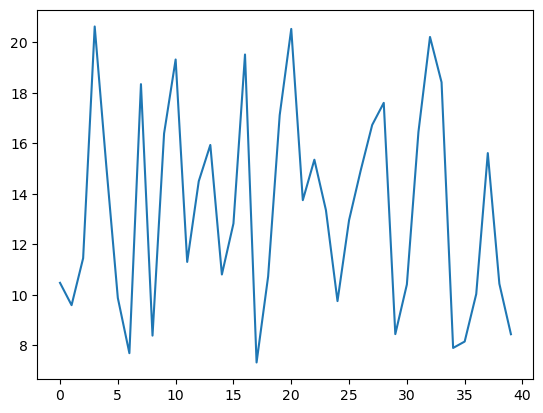

In [55]:
plt.plot(prediction_test)

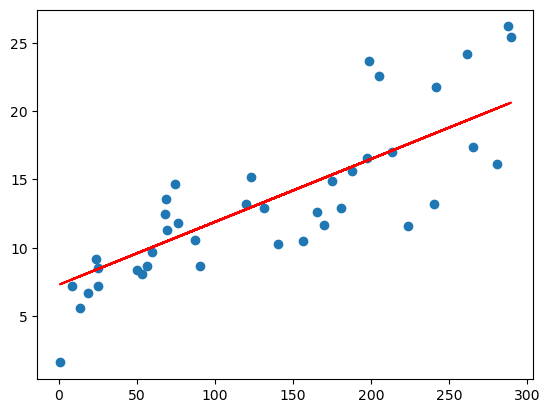

In [56]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,7.2924937735593645+0.04600779*X_test,'r')
plt.show()

Conclusion

So this is how we can predict future sales of a product with machine learning.